import necessary libraries

In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Image read convert to grayscale

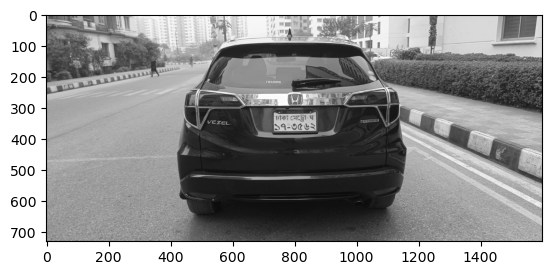

In [16]:
# Read the image
img = cv2.imread('carbd2.jpg')
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#show image
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Apply filter and find edges

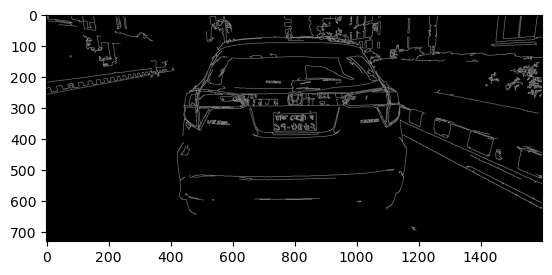

In [17]:
#noise removal
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 80, 400)    # Perform Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find Contours and apply mask

In [18]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [19]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [20]:
location

array([[[871, 315]],

       [[735, 314]],

       [[735, 373]],

       [[871, 373]]], dtype=int32)

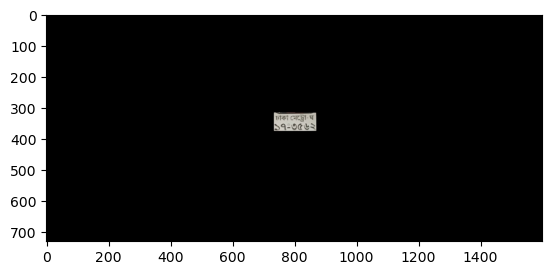

In [21]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

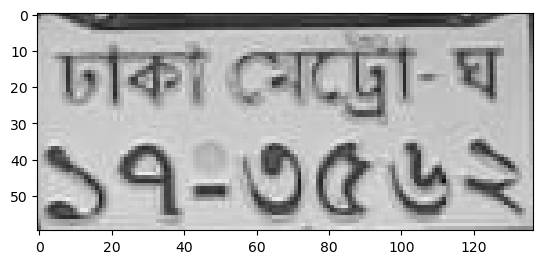

In [22]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Use Easyocr to read from the image

In [23]:
reader = easyocr.Reader( ['bn'] )
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 6], [132, 6], [132, 32], [2, 32]],
  'ঢাকা মেড্রো-ঘ',
  0.31358868219670116),
 ([[0, 27], [119, 27], [119, 60], [0, 60]], '১৭-৩৫৬', 0.9972349310894555)]

In [29]:
text = (result[0][-2] +" " +result[1][-2])
print(text)

ঢাকা মেড্রো-ঘ ১৭-৩৫৬


Render Result

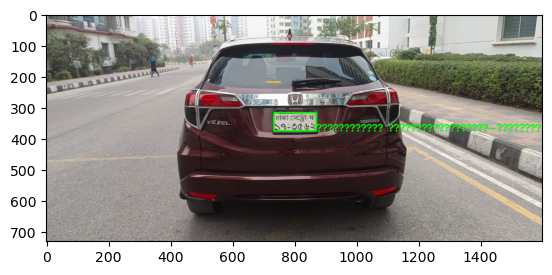

In [30]:
text = (result[0][-2]+result[1][-2])
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
